In [1]:
import pathlib
import joblib
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

from utils.data_utils import load_data
from utils.ml_utils import get_threshold_metrics, model_apply

In [2]:
%matplotlib inline

## Load models

In [3]:
model_file = pathlib.Path("models", "multiclass_cloneAE_wildtype.joblib")
top_model = joblib.load(model_file)

shuffle_model_file = pathlib.Path("models", "multiclass_cloneAE_wildtype_shuffled.joblib")
top_shuffle_model = joblib.load(shuffle_model_file)

## Load scores

In [4]:
treatment_replace = {
    "0.1% DMSO": "DMSO",
    "2.1 nM bortezomib": "2.1 nM",
    "21 nM bortezomib": "21 nM",
    "210 nM bortezomib": "210 nM"
}

In [5]:
score_file = pathlib.Path("scores", "all_single_cell_scores.tsv.gz")
scores_df = pd.read_csv(score_file, sep="\t").reset_index(drop=True)

scores_df = scores_df.assign(shuffle_label=scores_df.shuffled, treatment_label=scores_df.Metadata_treatment)
scores_df.shuffle_label = scores_df.shuffle_label.replace({True: "Shuffle: True", False: "Shuffle: False"})
scores_df.treatment_label = scores_df.treatment_label.replace(treatment_replace)

print(scores_df.shape)
scores_df.head(3)

(138218, 18)


,WT parental,Clone A,Clone E,Metadata_TableNumber,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_clone_number,Metadata_plate_ID,Metadata_plate_filename,Metadata_treatment,Metadata_treatment_time,Metadata_cell_density,data_fit,shuffled,shuffle_label,treatment_label
0,0.177995,0.764352,0.057653,224509484233353390719776067605878841752,467,218360,F08,218360,Clone A,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False,Shuffle: False,DMSO
1,0.776132,0.091972,0.131896,40616088648198851399731861275720782457,817,218360,E08,218360,WT parental,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False,Shuffle: False,DMSO
2,0.000365,0.307521,0.692115,118538072187850477949363265188742377263,471,218360,G02,218360,Clone E,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False,Shuffle: False,DMSO


In [6]:
scores_df.Metadata_treatment.value_counts()

0.1% DMSO            48784
2.1 nM bortezomib    43316
21 nM bortezomib     26330
210 nM bortezomib    19788
Name: Metadata_treatment, dtype: int64

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/clone_a_single_cell_proba.png
  warn('Filename: {}'.format(filename))


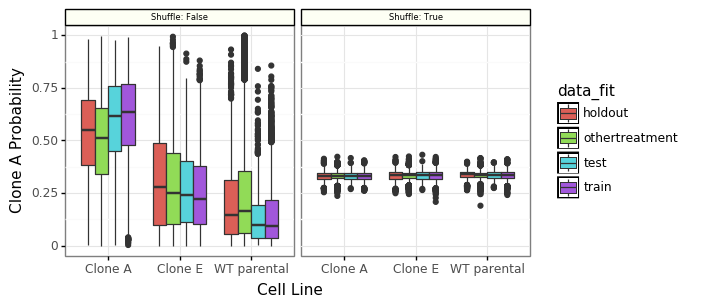

<ggplot: (-9223372036551540999)>

In [7]:
clone_a_gg = (
    gg.ggplot(scores_df, gg.aes(y="Clone A", x="Metadata_clone_number")) +
    gg.geom_boxplot(gg.aes(fill="data_fit")) +
    gg.facet_wrap("~shuffle_label") +
    gg.xlab("Cell Line") +
    gg.ylab("Clone A Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "clone_a_single_cell_proba.png")
clone_a_gg.save(file, height=3, width=6, dpi=400)

clone_a_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/clone_e_single_cell_proba.png
  warn('Filename: {}'.format(filename))


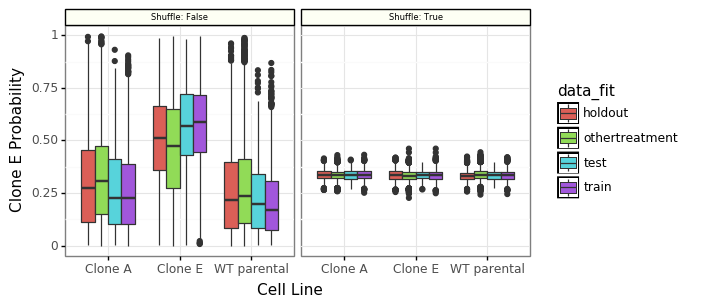

<ggplot: (300851183)>

In [8]:
clone_e_gg = (
    gg.ggplot(scores_df, gg.aes(y="Clone E", x="Metadata_clone_number")) +
    gg.geom_boxplot(gg.aes(fill="data_fit")) +
    gg.facet_wrap("~shuffle_label") +
    gg.xlab("Cell Line") +
    gg.ylab("Clone E Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "clone_e_single_cell_proba.png")
clone_e_gg.save(file, height=3, width=6, dpi=400)

clone_e_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/wt_parental_single_cell_proba.png
  warn('Filename: {}'.format(filename))


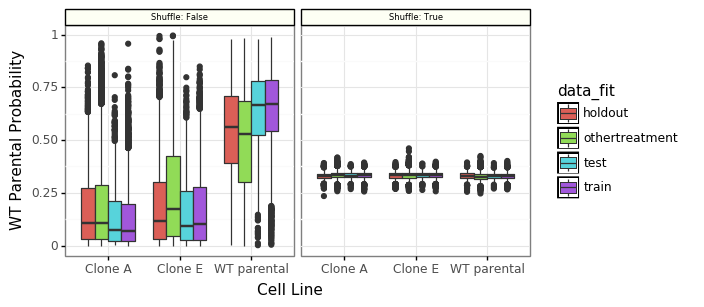

<ggplot: (301105714)>

In [9]:
wt_gg = (
    gg.ggplot(scores_df, gg.aes(y="WT parental", x="Metadata_clone_number")) +
    gg.geom_boxplot(gg.aes(fill="data_fit")) +
    gg.facet_wrap("~shuffle_label") +
    gg.xlab("Cell Line") +
    gg.ylab("WT Parental Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "wt_parental_single_cell_proba.png")
wt_gg.save(file, height=3, width=6, dpi=400)

wt_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 6 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/resistant_clone_scatter.png
  warn('Filename: {}'.format(filename))


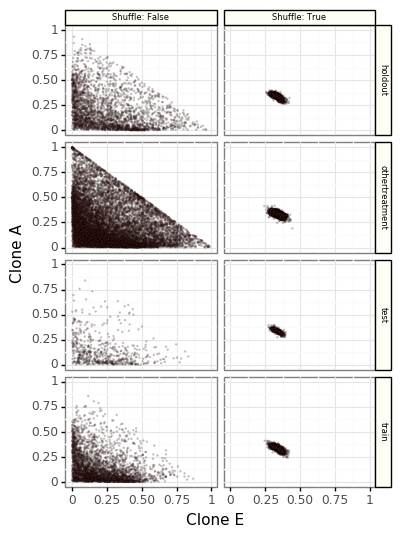

<ggplot: (-9223372036554217142)>

In [10]:
resistant_clone_gg = (
    gg.ggplot(scores_df.query("Metadata_clone_number == 'WT parental'"),
              gg.aes(y="Clone A", x="Clone E")) +
    gg.geom_point(gg.aes(fill="Metadata_clone_number"), size=0.01, alpha=0.2) +
    gg.facet_grid("data_fit~shuffle_label") +
    gg.xlab("Clone E") +
    gg.ylab("Clone A") +
    gg.theme_bw() +
    gg.scale_fill_discrete(guide=False) +
    gg.theme(strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "resistant_clone_scatter.png")
resistant_clone_gg.save(file, height=6, width=4, dpi=400)

resistant_clone_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/clone_a_dose.png
  warn('Filename: {}'.format(filename))


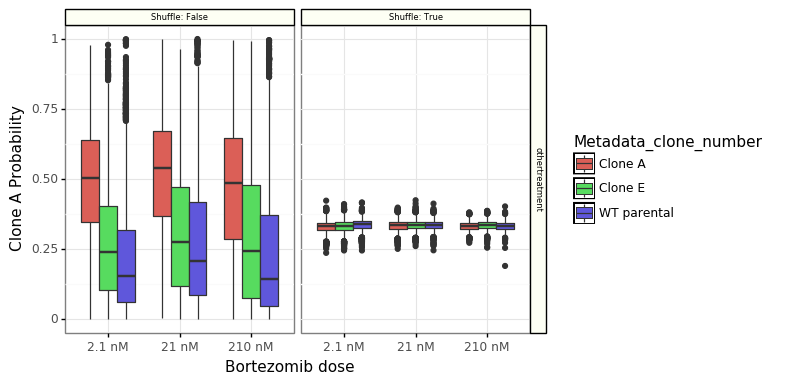

<ggplot: (-9223372036545951088)>

In [11]:
other_treatment_gg = (
    gg.ggplot(scores_df.query("data_fit == 'othertreatment'"),
              gg.aes(y="Clone A", x="treatment_label")) +
    gg.geom_boxplot(gg.aes(fill="Metadata_clone_number")) +
    gg.facet_grid("data_fit~shuffle_label") +
    gg.xlab("Bortezomib dose") +
    gg.ylab("Clone A Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "clone_a_dose.png")
other_treatment_gg.save(file, height=4, width=6, dpi=400)

other_treatment_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/clone_e_dose.png
  warn('Filename: {}'.format(filename))


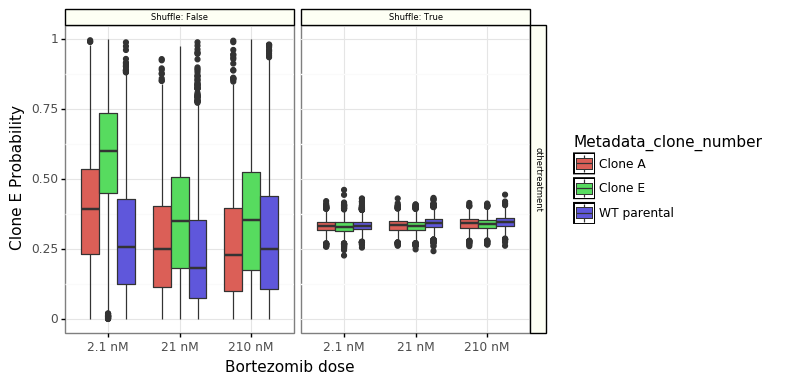

<ggplot: (-9223372036553680843)>

In [12]:
other_treatment_gg = (
    gg.ggplot(scores_df.query("data_fit == 'othertreatment'"),
              gg.aes(y="Clone E", x="treatment_label")) +
    gg.geom_boxplot(gg.aes(fill="Metadata_clone_number")) +
    gg.facet_grid("data_fit~shuffle_label") +
    gg.xlab("Bortezomib dose") +
    gg.ylab("Clone E Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "clone_e_dose.png")
other_treatment_gg.save(file, height=4, width=6, dpi=400)

other_treatment_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/predictions/wt_parental_dose.png
  warn('Filename: {}'.format(filename))


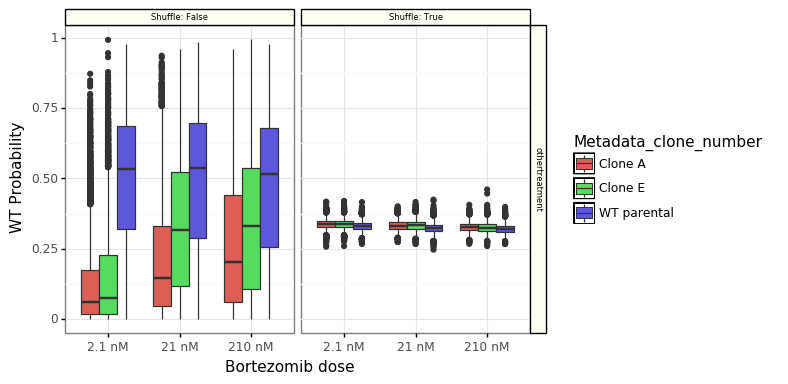

<ggplot: (-9223372036551533375)>

In [13]:
other_treatment_gg = (
    gg.ggplot(scores_df.query("data_fit == 'othertreatment'"),
              gg.aes(y="WT parental", x="treatment_label")) +
    gg.geom_boxplot(gg.aes(fill="Metadata_clone_number")) +
    gg.facet_grid("data_fit~shuffle_label") +
    gg.xlab("Bortezomib dose") +
    gg.ylab("WT Probability") +
    gg.theme_bw() +
    gg.theme(legend_key=gg.element_rect(color="black", fill="white"),
             strip_text=gg.element_text(size=6, color="black"),
             strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
)

file = pathlib.Path("figures", "predictions", "wt_parental_dose.png")
other_treatment_gg.save(file, height=4, width=6, dpi=400)

other_treatment_gg

## Load Data and Predict Class

In [14]:
data_dict = load_data(
    return_meta=True,
    shuffle_row_order=True,
    holdout=True,
    othertreatment=True
)

print(data_dict["train"]["x"].shape)
print(data_dict["test"]["x"].shape)
print(data_dict["holdout"]["x"].shape)
print(data_dict["othertreatment"]["x"].shape)

data_dict["test"]["x"].head(3)

(12608, 1954)
(2225, 1954)
(9559, 1954)
(44717, 1954)


,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MeanRadius,Cells_AreaShape_MinFeretDiameter,Cells_AreaShape_MinorAxisLength,Cells_AreaShape_Orientation,...,Nuclei_Texture_Variance_Mito_5_02,Nuclei_Texture_Variance_Mito_5_03,Nuclei_Texture_Variance_RNA_10_00,Nuclei_Texture_Variance_RNA_10_01,Nuclei_Texture_Variance_RNA_10_02,Nuclei_Texture_Variance_RNA_10_03,Nuclei_Texture_Variance_RNA_5_00,Nuclei_Texture_Variance_RNA_5_01,Nuclei_Texture_Variance_RNA_5_02,Nuclei_Texture_Variance_RNA_5_03
0,0.094398,0.161807,0.254259,0.903477,-0.469299,0.455920,1.330388,0.530509,0.629529,-1.376499,...,0.393038,0.391515,1.009771,0.713457,0.969523,0.811524,1.026319,0.968223,1.022461,1.032441
1,-0.660974,-1.184603,0.398314,0.949123,-0.625146,0.453175,-1.060659,-0.841056,-1.062543,1.070867,...,-0.408687,-0.467276,-0.431639,-0.450467,-0.424818,-0.430867,-0.437715,-0.448419,-0.427487,-0.451335
2,-0.470056,-0.165039,0.846744,0.969501,-1.412393,-1.252118,-0.123261,0.440386,-0.065262,0.744990,...,-0.251090,-0.185469,0.024475,0.015456,0.034995,-0.005040,0.000928,0.011821,0.001111,0.035160


In [15]:
y_recode = {"WT parental": 0, "Clone A": 1, "Clone E": 2}
y_recode_reverse = {y: x for x, y in y_recode.items()}

predict_dict = {}
for data_fit in data_dict:
    predict_dict[data_fit] = {}
    for shuffled in [True, False]:
        if shuffled:
            model = top_model
        else:
            model = top_shuffle_model

        predict_dict[data_fit][f"shuffled_{shuffled}"] = model_apply(
            model=model,
            x_df=data_dict[data_fit]["x"],
            meta_df=data_dict[data_fit]["meta"],
            y_recode=y_recode_reverse,
            data_fit=data_fit,
            shuffled=shuffled,
            predict_proba=False
        )

In [16]:
pred_df = []
for data_fit in data_dict:
    for shuffled in [False, True]:
        pred_df.append(predict_dict[data_fit][f"shuffled_{shuffled}"])

pred_df = pd.concat(pred_df, axis="rows").reset_index(drop=True)

output_file = pathlib.Path("scores", "all_single_cell_binary_predictions.tsv.gz")
pred_df.to_csv(output_file, sep="\t", compression="gzip", index=False)

print(pred_df.shape)
pred_df.head()

(138218, 14)


,WT parental,Metadata_TableNumber,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_clone_number,Metadata_plate_ID,Metadata_plate_filename,Metadata_treatment,Metadata_treatment_time,Metadata_cell_density,data_fit,shuffled
0,1,318165284178896629253006488693508277408,25,218360,D06,218360,Clone E,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False
1,1,233635398544642288656424749280491073693,447,218360,D08,218360,Clone E,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False
2,1,213615935970490117812207546998927362843,265,218360,D06,218360,Clone E,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False
3,1,104082596480619265561022498513524842275,675,218360,C06,218360,Clone A,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False
4,1,66083697237493098135505108384966415133,97,218360,E08,218360,WT parental,218360,20200626-WTpAE-Lo,0.1% DMSO,13 hr,2.5x10^3 cells/well,train,False


## Binarize Y

In [17]:
# Recode y matrix for metric eval
lb = LabelBinarizer().fit(scores_df.loc[:, ["Metadata_clone_number"]])
cell_line_classes = lb.classes_

y_onehot_df = lb.transform(scores_df.loc[:, ["Metadata_clone_number"]])
y_onehot_df = pd.DataFrame(y_onehot_df, columns=cell_line_classes).reset_index(drop=True)

print(y_onehot_df.shape)
y_onehot_df.head(3)

(138218, 3)


,Clone A,Clone E,WT parental
0,1,0,0
1,0,0,1
2,0,1,0


In [18]:
y_pred_onehot_df = lb.transform(pred_df.loc[:, ["WT parental"]].replace(y_recode_reverse))
y_pred_onehot_df = pd.DataFrame(y_pred_onehot_df, columns=cell_line_classes).reset_index(drop=True)

print(y_pred_onehot_df.shape)
y_pred_onehot_df.head(3)

(138218, 3)


,Clone A,Clone E,WT parental
0,1,0,0
1,1,0,0
2,1,0,0


In [19]:
def get_confusion_matrix(y_true, y_pred, labels):
    """
    Obtain confusion matrix for input truth and predictions (import only)
    Arguments:
    y_true - numpy array of class assignments
    y_pred - numpy array of class predictions
    name - label for output file and heatmap title
    Output:
    Confusion matrix table and heatmap axes
    """

    conf_mat = confusion_matrix(y_true, y_pred)

    conf_mat = (
        pd.DataFrame(conf_mat,
                     index=[f"{x}_true" for x in labels],
                     columns=[f"{x}_pred" for x in labels])
    )

    conf_mat_percent = conf_mat.divide(conf_mat.sum(axis=0), axis=1)
    ax = sns.heatmap(conf_mat_percent, annot=True, fmt='.1%')

    return conf_mat, ax

## Extract performance metrics

In [20]:
aurocs = []
avg_precisions = []
roc_dfs = []
pr_dfs = []
for data_fit in scores_df.data_fit.unique():
    for shuffled in scores_df.shuffled.unique():
        scores_subset_df = scores_df.query("data_fit == @data_fit").query("shuffled == @shuffled")
        y_subset_df = y_onehot_df.loc[scores_subset_df.index.tolist(), :]
        for cell_line in cell_line_classes:
            y_true = y_subset_df.loc[:, cell_line]
            y_pred = scores_subset_df.loc[:, cell_line]
            metric_results = get_threshold_metrics(y_true, y_pred, drop_intermediate=False)

            auroc_result = metric_results["auroc"]
            avg_precision_result = metric_results["average_precision"]
            roc_df = metric_results["roc_df"]
            pr_df = metric_results["pr_df"]
            
            auroc_result = [auroc_result, data_fit, shuffled, cell_line]
            avg_precision_result = [avg_precision_result, data_fit, shuffled, cell_line]
            roc_df = roc_df.assign(data_fit=data_fit, shuffled=shuffled, cell_line=cell_line)
            pr_df = pr_df.assign(data_fit=data_fit, shuffled=shuffled, cell_line=cell_line)
            
            aurocs.append(auroc_result)
            avg_precisions.append(avg_precision_result)
            roc_dfs.append(roc_df)
            pr_dfs.append(pr_df)

In [21]:
auroc_df = pd.DataFrame(aurocs, columns=["auroc", "data_fit", "shuffled", "cell_line"])
precision_df = pd.DataFrame(avg_precisions, columns=["avg_precision", "data_fit", "shuffled", "cell_line"])
roc_df = pd.concat(roc_dfs)
pr_df = pd.concat(pr_dfs)

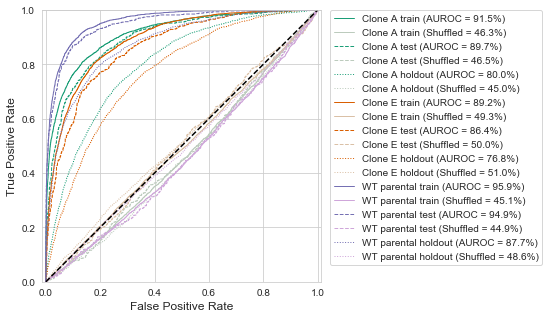

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
cell_line_colors = {"Clone A": "#1b9e77", "Clone E": "#d95f02", "WT parental": "#7570b3"}
shuffle_colors = {"Clone A": "#BCCBBD", "Clone E": "#DAC0A6", "WT parental": "#CFA6DA"}
linestyle = {"train": 'solid', "test": 'dashed', "holdout": "dotted"}
idx = 0

for cell_line in cell_line_classes:
    for data_fit in ["train", "test", "holdout"]:
        roc_sub_df = (
            roc_df
            .query("data_fit == @data_fit")
            .query("cell_line == @cell_line")
        )

        auroc = (
            auroc_df
            .query("data_fit == @data_fit")
            .query("cell_line == @cell_line")
        )
    
    
        roc_sub_shuffle_df = roc_sub_df.query("shuffled == True")
        roc_sub_df = roc_sub_df.query("shuffled == False")
        
        auroc_shuffle = auroc.query("shuffled == True").auroc.tolist()[0]
        auroc = auroc.query("shuffled == False").auroc.tolist()[0]
        
        plt.plot(roc_sub_df.fpr,
                 roc_sub_df.tpr,
                 label='{} {} (AUROC = {:.1%})'.format(cell_line, data_fit, auroc),
                 linewidth=1,
                 linestyle=linestyle[data_fit],
                 c=cell_line_colors[cell_line])
        
        plt.plot(roc_sub_shuffle_df.fpr,
                 roc_sub_shuffle_df.tpr,
                 label='{} {} (Shuffled = {:.1%})'.format(cell_line, data_fit, auroc_shuffle),
                 linewidth=1,
                 linestyle=linestyle[data_fit],
                 c=shuffle_colors[cell_line])

plt.axis('equal')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

plt.tick_params(labelsize=10)

lgd = plt.legend(bbox_to_anchor=(1.03, 1),
                 loc=2,
                 borderaxespad=0.,
                 fontsize=10)

file = pathlib.Path('figures', "metrics", 'roc_curve_single_cell.png')
plt.savefig(file, bbox_extra_artists=(lgd,), dpi=500, bbox_inches='tight')

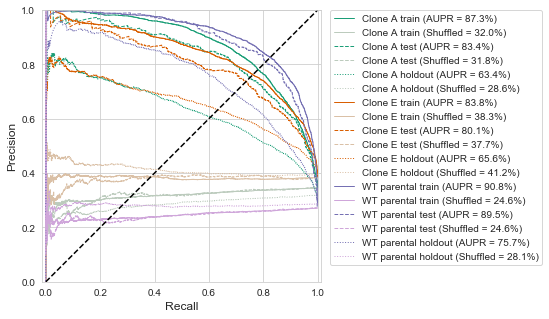

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))

for cell_line in cell_line_classes:
    for data_fit in ["train", "test", "holdout"]:
        pr_sub_df = (
            pr_df
            .query("data_fit == @data_fit")
            .query("cell_line == @cell_line")
        )

        aupr = (
            precision_df
            .query("data_fit == @data_fit")
            .query("cell_line == @cell_line")
        )
    
    
        pr_sub_shuffle_df = pr_sub_df.query("shuffled == True")
        pr_sub_df = pr_sub_df.query("shuffled == False")
        
        aupr_shuffle = aupr.query("shuffled == True").avg_precision.tolist()[0]
        aupr = aupr.query("shuffled == False").avg_precision.tolist()[0]
        
        plt.plot(pr_sub_df.recall,
                 pr_sub_df.precision,
                 label='{} {} (AUPR = {:.1%})'.format(cell_line, data_fit, aupr),
                 linewidth=1,
                 linestyle=linestyle[data_fit],
                 c=cell_line_colors[cell_line])
        
        plt.plot(pr_sub_shuffle_df.recall,
                 pr_sub_shuffle_df.precision,
                 label='{} {} (Shuffled = {:.1%})'.format(cell_line, data_fit, aupr_shuffle),
                 linewidth=1,
                 linestyle=linestyle[data_fit],
                 c=shuffle_colors[cell_line])

plt.axis('equal')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)

plt.tick_params(labelsize=10)

lgd = plt.legend(bbox_to_anchor=(1.03, 1),
                 loc=2,
                 borderaxespad=0.,
                 fontsize=10)

file = pathlib.Path('figures', "metrics", 'pr_curve_single_cell.png')
plt.savefig(file, bbox_extra_artists=(lgd,), dpi=500, bbox_inches='tight')

## Get confusion matrices

In [24]:
for data_fit in scores_df.data_fit.unique():
    for shuffled in scores_df.shuffled.unique():
        pred_subsdet_df = pred_df.query("data_fit == @data_fit").query("shuffled == @shuffled")
        
        y_true_subset_df = pred_subset_df.loc[:, ["Metadata_clone_number"]].replace(y_recode).Metadata_clone_number.tolist()
        y_pred_subset_df = pred_subset_df.loc[:, ["WT parental"]].iloc[:, 0].tolist()
        
        result, confusion_ax = get_confusion_matrix(y_true_subset_df, y_pred_subset_df, cell_line_classes)
        confusion_ax.set_title(f"{data_fit}, {shuffled}")

NameError: name 'pred_subset_df' is not defined

In [ ]:
data_fit = "othertreatment"
shuffled = False
pred_subsdet_df = pred_df.query("data_fit == @data_fit").query("shuffled == @shuffled")

y_true_subset_df = pred_subset_df.loc[:, ["Metadata_clone_number"]].replace(y_recode).Metadata_clone_number.tolist()
y_pred_subset_df = pred_subset_df.loc[:, ["WT parental"]].iloc[:, 0].tolist()

result, confusion_ax = get_confusion_matrix(y_true_subset_df, y_pred_subset_df, cell_line_classes)
confusion_ax.set_title(f"{data_fit}, {shuffled}")